### XGboost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import precision_recall_fscore_support,roc_auc_score
import lightgbm as lgb
import joblib
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost.callback import EarlyStopping
from scipy.stats import randint, uniform
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from functools import reduce
from sklearn.metrics import recall_score

############################################################################
year2021



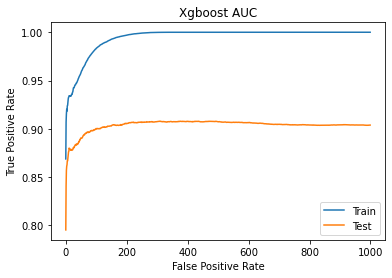

best iteration 310
auc: 0.9079037431238689


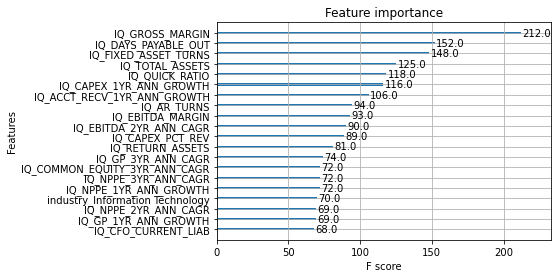

Accuracy: 84.82%


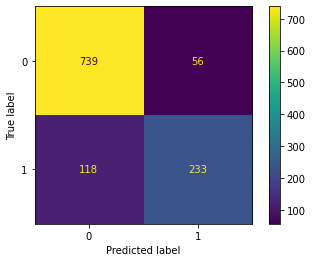

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       795
           1       0.81      0.66      0.73       351

    accuracy                           0.85      1146
   macro avg       0.83      0.80      0.81      1146
weighted avg       0.85      0.85      0.84      1146

############################################################################
############################################################################
year2020



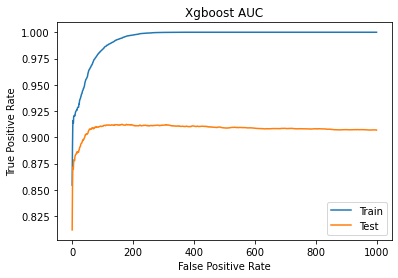

best iteration 179
auc: 0.9123586108846098


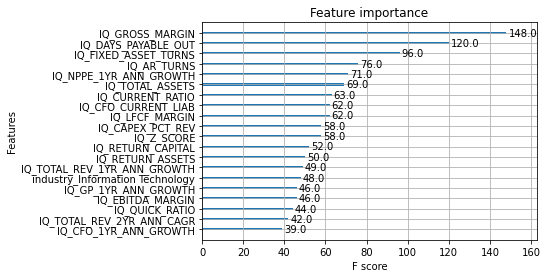

Accuracy: 84.80%


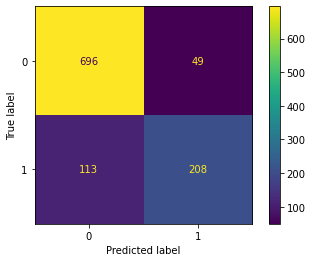

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       745
           1       0.81      0.65      0.72       321

    accuracy                           0.85      1066
   macro avg       0.83      0.79      0.81      1066
weighted avg       0.84      0.85      0.84      1066

############################################################################
############################################################################
year2019



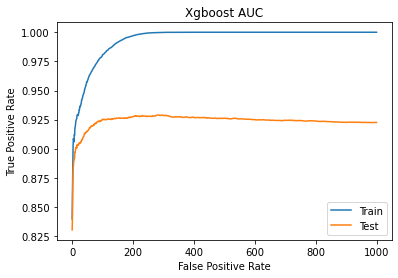

best iteration 282
auc: 0.9290317102817103


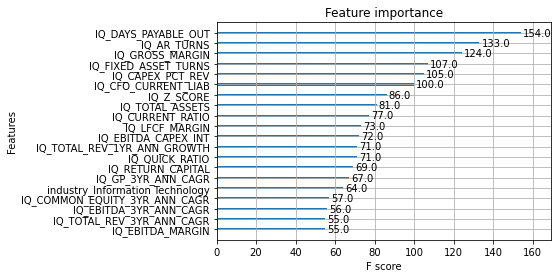

Accuracy: 86.95%


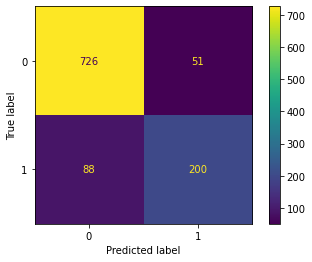

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       777
           1       0.80      0.69      0.74       288

    accuracy                           0.87      1065
   macro avg       0.84      0.81      0.83      1065
weighted avg       0.87      0.87      0.87      1065

############################################################################
############################################################################
year2018



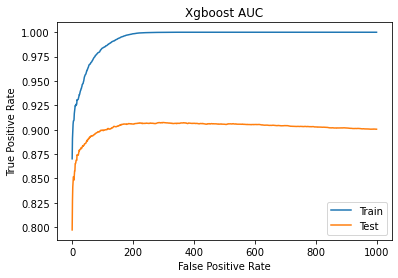

best iteration 299
auc: 0.9074444509815458


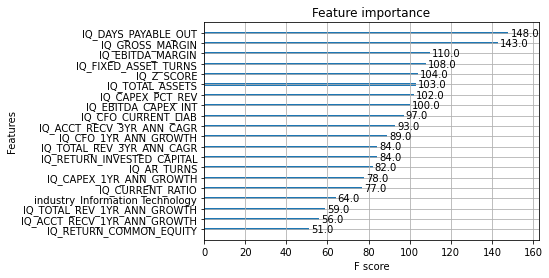

Accuracy: 85.32%


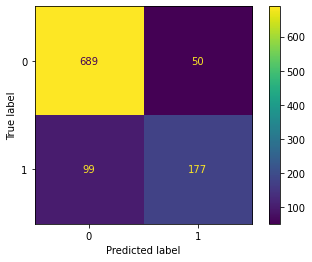

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       739
           1       0.78      0.64      0.70       276

    accuracy                           0.85      1015
   macro avg       0.83      0.79      0.80      1015
weighted avg       0.85      0.85      0.85      1015

############################################################################
############################################################################
year2017



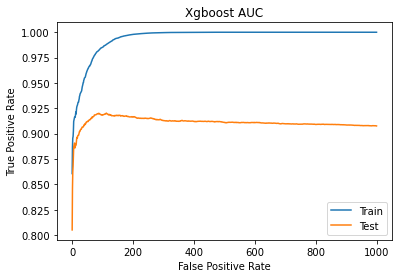

best iteration 113
auc: 0.92026701562683


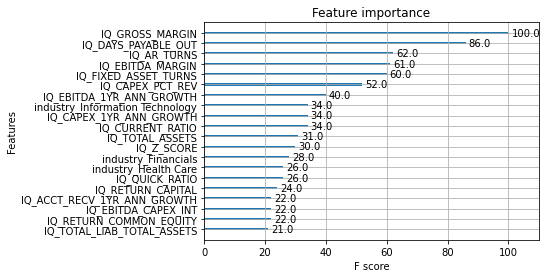

Accuracy: 85.50%


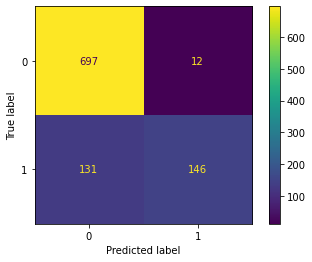

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       709
           1       0.92      0.53      0.67       277

    accuracy                           0.85       986
   macro avg       0.88      0.76      0.79       986
weighted avg       0.86      0.85      0.84       986

############################################################################
############################################################################
year2016



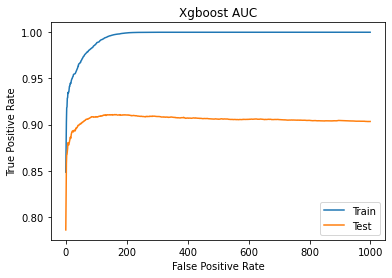

best iteration 166
auc: 0.9109158773800065


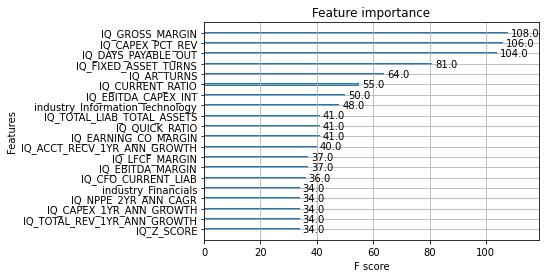

Accuracy: 85.76%


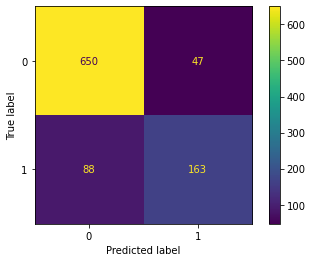

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       697
           1       0.78      0.65      0.71       251

    accuracy                           0.86       948
   macro avg       0.83      0.79      0.81       948
weighted avg       0.85      0.86      0.85       948

############################################################################
############################################################################
year2015



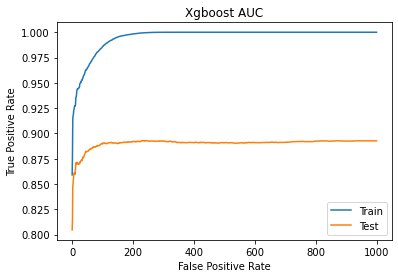

best iteration 242
auc: 0.8930364873222016


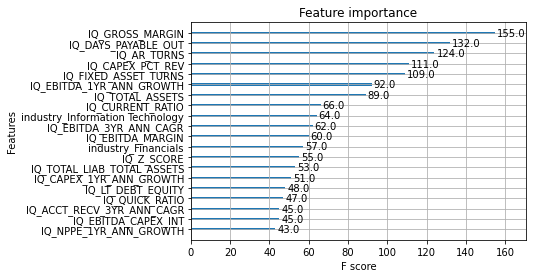

Accuracy: 86.04%


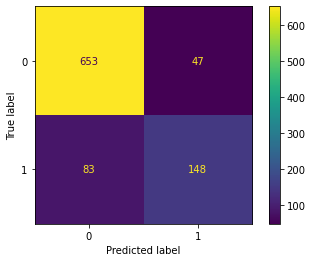

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       700
           1       0.76      0.64      0.69       231

    accuracy                           0.86       931
   macro avg       0.82      0.79      0.80       931
weighted avg       0.86      0.86      0.86       931

############################################################################
############################################################################
year2014



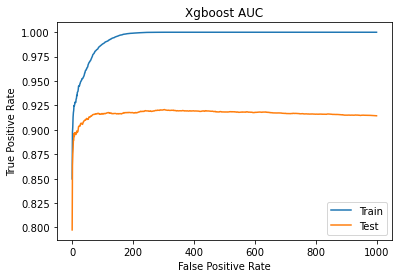

best iteration 304
auc: 0.920772106773324


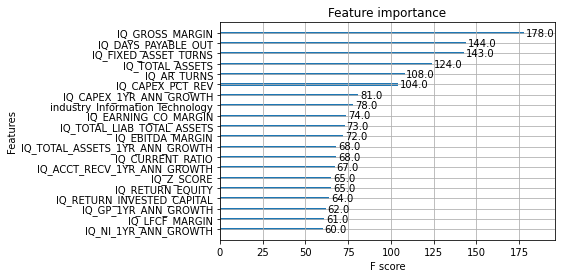

Accuracy: 85.70%


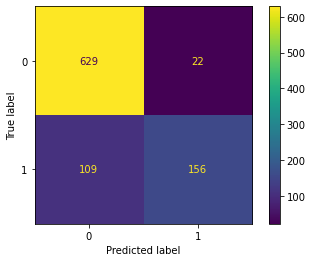

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       651
           1       0.88      0.59      0.70       265

    accuracy                           0.86       916
   macro avg       0.86      0.78      0.80       916
weighted avg       0.86      0.86      0.85       916

############################################################################
Accuracy 2021 to 2014 [84.81675392670157, 84.80300187617262, 86.94835680751174, 85.32019704433498, 85.49695740365112, 85.75949367088607, 86.03651987110635, 85.69868995633188]


AUC 2021 to 2014 [0.9079037431238689, 0.9123586108846098, 0.9290317102817103, 0.9074444509815458, 0.92026701562683, 0.9109158773800065, 0.8930364873222016, 0.920772106773324]


recall score 2021 to 2014 [0.6638176638176638, 0.6479750778816199, 0.6944444444444444, 0.6413043478260869, 0.5270758122743683, 0.649402390438247, 0.6406926406926406, 0.5886792452830188]


average recall of 1:  0.6316739528322612


In [2]:
#list_year = ['2021','2020','2019','2018','2017','2016','2015','2014']
list_year = ['2021']
list_year2 = ['2020']
accuracy_list = []
recall_list = []
auc_list = []

def Average(lst):
    return reduce(lambda a, b: a + b, lst) / len(lst)

for year in list_year:
    print('############################################################################')
    print('year'+ year + '\n')
    df_ratios = pd.read_csv(year+'.csv')
    #df_ratios.head()

    # Display the structure
    #df_ratios.info()

    # Normalization
    from sklearn import preprocessing
    min_max_scaler = preprocessing.MinMaxScaler()
    for i in df_ratios.columns[3:-12]:
        df_ratios[i] = min_max_scaler.fit_transform(df_ratios[[i]].to_numpy())*1000
        df_ratios[i] = df_ratios[i].apply(lambda x: np.log10(x + 0.01))
        ### this normalization is arbitrary, but should put all nos. in comparable basis of the same magnitude - can see the
        ###   describe statistics below

    df_ratios_new=df_ratios
    X = df_ratios_new.iloc[:,3:-1]
    y = df_ratios_new.iloc[:,-1]

    data_dmatrix = xgb.DMatrix(data=X,label=y)
    Train, Test = train_test_split(df_ratios_new, test_size=0.4, random_state=43)
    X_train, y_train = Train.iloc[:,3:-1], Train.iloc[:,-1]
    X_test, y_test = Test.iloc[:,3:-1], Test.iloc[:,-1]

    # to save feature importance
    feature_importance = pd.DataFrame(index=None)

    feature_importance['features'] = X_train.columns

    #feature_importance
    xgb_params_fixed = {
        'learning_rate': 0.05,

        # use 'multi:softprob' for multi-class problems
        'objective': 'binary:logistic',

        # length of the longest path from a root to a leaf
        'max_depth': 4,

        # subsample ratio of columns when constructing each tree
        # random sample to be used.
        'colsample_bytree': 0.7,

        # setting it to a positive value 
        # might help when class is extremely imbalanced
        # as it makes the update more conservative
        # 0 max_delta_step means no limit on weight
        # n_estimators = number of runs XGboost try to learn
        'max_delta_step': 0, 
        'n_estimators': 1000,

        # use all possible cores for training
        # parallelism 
        'n_jobs': -1
    }
    model_xgb = XGBClassifier(**xgb_params_fixed)

    # we also specify the evaluation dataset and metric
    # to record the model's performance history, note that
    # we can supply multiple evaluation metric by passig a 
    # list to `eval_metric`
    eval_set = [(X_train, y_train), (X_test, y_test)]
    model_xgb.fit(X_train, y_train, eval_metric='auc', eval_set=eval_set, verbose=False)

    history = model_xgb.evals_result_
    x_axis = range(len(history['validation_0']['auc']))
    plt.plot(x_axis, history['validation_0']['auc'], label='Train')
    plt.plot(x_axis, history['validation_1']['auc'], label='Test')
    plt.legend(loc='best')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Xgboost AUC')
    plt.show()

    # we set verbose to 10 so that it will print out the evaluation metric for the
    # evaluation dataset for every 10 round
    early_stop = EarlyStopping(rounds=200, save_best=True)
    xgb_params_fixed['callbacks'] = [early_stop]
    model_xgb = XGBClassifier(**xgb_params_fixed)

    model_xgb.fit(
        X_train, y_train,
        #auc cause it is logistic
        eval_metric='auc',
        eval_set=eval_set,
        #do not print validation metric
        verbose=0
    )

    # we can then access the best number of tree and use it later for prediction
    print('best iteration', model_xgb.best_ntree_limit)


    # print the model's performance
    y_pred_prob = model_xgb.predict_proba(X_test)[:, 1]
    #print('auc:', roc_auc_score(y_test, y_pred_prob))


    # ensure we can serialize and deserialize the model
    model_checkpoint = 'model.xgb'
    model_xgb.save_model(model_checkpoint)
    model_xgb_loaded = XGBClassifier()
    model_xgb_loaded.load_model(model_checkpoint)

    y_pred_prob = model_xgb_loaded.predict_proba(X_test,)[:, 1]
    print('auc:', roc_auc_score(y_test, y_pred_prob))

    def plot_xgboost_importance(xgboost_model, feature_names, threshold=0.5):
        # convert from dictionary to tuples and sort by the
        # importance score in ascending order for plotting purpose
        importance = xgboost_model.get_booster().get_score(importance_type='gain')
        tuples = [(int(k[1:]), importance[k]) for k in importance]
        tuples = sorted(tuples, key = itemgetter(1))
        labels, values = zip(*tuples)

        # make importances relative to max importance,
        # and filter out those that have smaller than 5%
        # relative importance (threshold chosen arbitrarily)
        labels, values = np.array(labels), np.array(values)
        values = np.round(100 * values / np.max(values), 2)
        mask = values > threshold
        labels, values = labels[mask], values[mask]
        feature_labels = feature_names[labels]

        ylocs = np.arange(values.shape[0])
        plt.barh(ylocs, values, align='center')
        for x, y in zip(values, ylocs):
            plt.text(x + 1, y, x, va='center')

        plt.ylabel('Features')
        plt.xlabel('Relative Importance Score')
        plt.title('Feature Importance Score')
        plt.xlim([0, 110])
        plt.yticks(ylocs, feature_labels)

        # revert the ordering of the importance
        return labels[::-1]

    import matplotlib.pylab as plt
    from matplotlib import pyplot
    from xgboost import plot_importance
    plot_importance(model_xgb, max_num_features=20) # top 10 most important features
    plt.show()
    
    from sklearn.metrics import accuracy_score
    predictions = [round(value) for value in y_pred_prob]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    accuracy_list.append(accuracy * 100.0)
    auc_list.append(roc_auc_score(y_test, y_pred_prob))
    
    from sklearn.metrics import confusion_matrix
    import sklearn.metrics as metrics
    confusion_matrix = confusion_matrix(y_test, predictions)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
    cm_display.plot()
    plt.show()
    print(classification_report(y_test, predictions))
    recallScore = recall_score(y_test, predictions)
    recall_list.append(recallScore)
    print('############################################################################')
print('Accuracy 2021 to 2014', accuracy_list)
print('')
print('')
print('AUC 2021 to 2014', auc_list)
print('')
print('')
average_recall = Average(recall_list)
print('recall score 2021 to 2014', recall_list)
print('')
print('')
print('average recall of 1: ', average_recall)
